## Simulate a DMP-SBM

First import the library `dmprdpg`.

In [1]:
import dmprdpg

Assume $K=3$ layers and $T=3$ time points, and $G=G^\prime=4$, representing the number of communities. Define a dictionary of $G\times G^\prime$ between-community probability matrices (essentially representing a $G\times G\times K\times T$ tensor). 

In [2]:
# Pre-define matrix B - Index is (layer, time)
import numpy as np
B_dict = {
    (0, 0): np.array([[0.08, 0.02, 0.18, 0.10], [0.02, 0.20, 0.04, 0.10], [0.18, 0.04, 0.02, 0.02], [0.10, 0.10, 0.02, 0.06]]),
    (0, 1): np.array([[0.16, 0.16, 0.04, 0.10], [0.16, 0.16, 0.04, 0.10], [0.04, 0.04, 0.09, 0.02], [0.10, 0.10, 0.02, 0.06]]),
    (0, 2): np.array([[0.08, 0.02, 0.18, 0.10], [0.02, 0.20, 0.04, 0.10], [0.18, 0.04, 0.02, 0.02], [0.10, 0.10, 0.02, 0.06]]),
    (1, 0): np.array([[0.08, 0.02, 0.18, 0.10], [0.02, 0.20, 0.04, 0.10], [0.18, 0.04, 0.02, 0.02], [0.10, 0.10, 0.02, 0.06]]),
    (1, 1): np.array([[0.16, 0.16, 0.04, 0.10], [0.16, 0.16, 0.04, 0.10], [0.04, 0.04, 0.09, 0.02], [0.10, 0.10, 0.02, 0.06]]),
    (1, 2): np.array([[0.08, 0.02, 0.18, 0.10], [0.02, 0.20, 0.04, 0.10], [0.18, 0.04, 0.02, 0.02], [0.10, 0.10, 0.02, 0.06]]),
    (2, 0): np.array([[0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08]]),
    (2, 1): np.array([[0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08]]),
    (2, 2): np.array([[0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08], [0.08, 0.08, 0.08, 0.08]])
}

Using the functions in `dmprdpg`, sample a DMP-SBM via the function `simulate_dpsbm`, using `B_dict`.

In [23]:
A_dict, z, z_prime = dmprdpg.simulate_dmpsbm(n=1000, B_dict=B_dict)


Calculate the DUASE from the sampled adjacency matrices, using the function `duase` in `dmprdpg`. 

In [24]:
X, Y = dmprdpg.duase(A_dict, K=3, T=3, d=2)

Plot the output of DUASE.

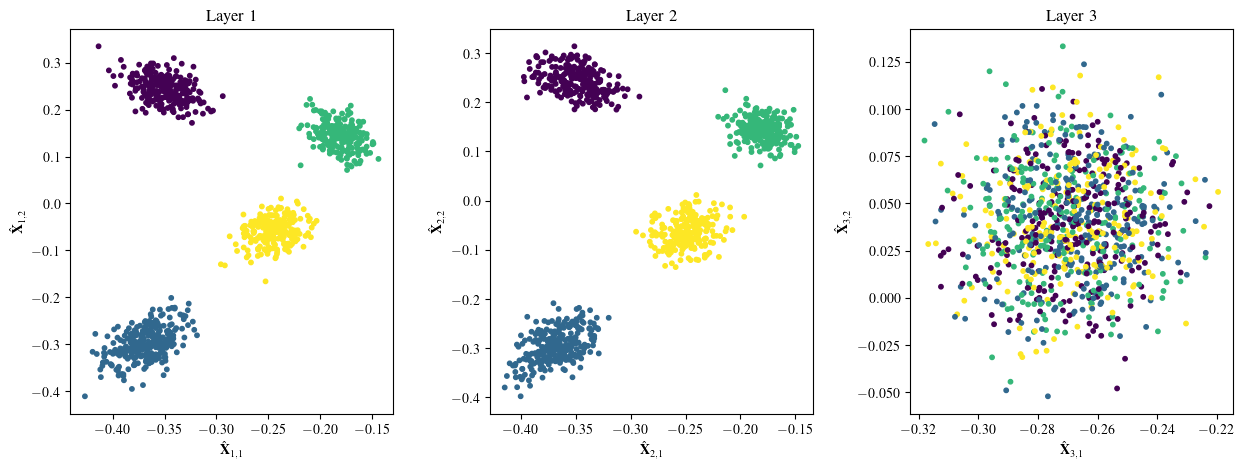

In [25]:
import matplotlib.pyplot as plt
## Compile with tikz and times font
plt.rc('text', usetex=True)
plt.rc('font', family='times')
## Plot all layers in different subfigures
fig, axs = plt.subplots(1,3, figsize=(15, 5))
## Slightly augment distance between subfigures
plt.subplots_adjust(wspace=0.3)
for k in range(3):
    axs[k].scatter(X[:,0,k], X[:,1,k], c=z, s=10)
    axs[k].set_title(f"Layer {k+1}")
    ## Axis labels
    axs[k].set_xlabel(r"$\hat{\mathbf{X}}_{" + str(k+1) + ",1}$")
    axs[k].set_ylabel(r"$\hat{\mathbf{X}}_{" + str(k+1) + ",2}$")
plt.show()

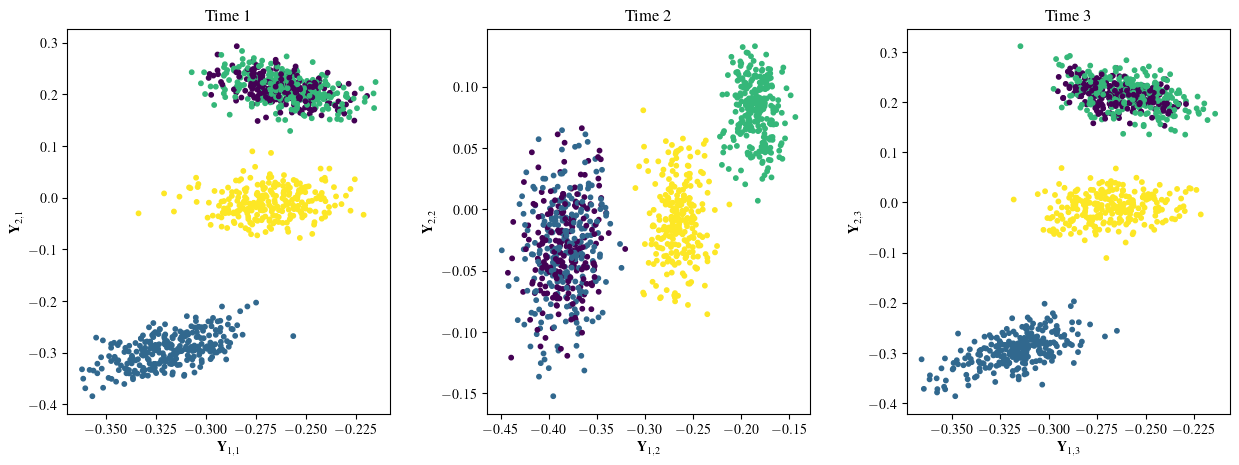

In [26]:
## Repeat for different times
fig, axs = plt.subplots(1,3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3)
for t in range(3):
    axs[t].scatter(Y[:,0,t], Y[:,1,t], c=z_prime, s=10)
    axs[t].set_title(f"Time {t+1}")
    axs[t].set_xlabel(r"$\mathbf{Y}_{1," + str(t+1) + "}$")
    axs[t].set_ylabel(r"$\mathbf{Y}_{2," + str(t+1) + "}$")
plt.show()

Apply classic multidimensional scaling on the right embedding $\hat{\mathbf{Y}}_t,\ t=1,\dots,T$.

In [ ]:
D = dmprdpg.cmds(distance_matrix(Y))